## CO2 Emission Project

<p style="font-size: 22px; font-weight: bold;">Understand the data</p>

Let's download and use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

My task will be to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features. 


<p style="font-size: 22px; font-weight: bold;">Data source</p>
The dataset you will use resides at the following URL:

In [18]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

<p><strong style="font-size:20px;">Let's import basics machine Learning modules</strong></p>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p><strong style="font-size:20px;">Let's load the data in a dataframe</strong></p>

In [22]:
df = pd.read_csv(url)

In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<p><strong style="font-size:20px;">Let's fecth all the information about the dataframe df</strong></p>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<p style="font-size:17px;">-->We can see that the dataframe is already clean, and there is no null values.<br>    Let's now explore the relationships(correlations) between columns</p>

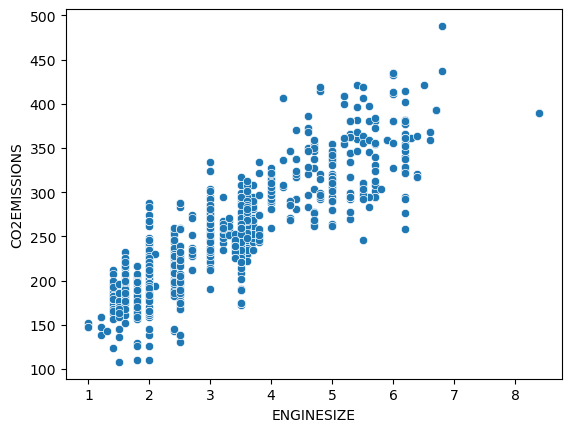

In [39]:
sns.scatterplot(df, x='ENGINESIZE', y='CO2EMISSIONS');

<p>The scatter plot bellow shows a clear linear relationship between Enginesize and CO2 emissions. In fact, the bigger is the engine, the more CO2 it emmits.</p>

<Axes: xlabel='FUELTYPE', ylabel='CO2EMISSIONS'>

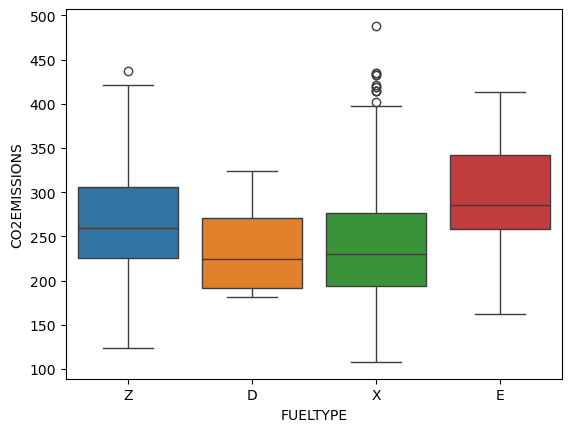

In [44]:
sns.boxplot(df, x='FUELTYPE', y='CO2EMISSIONS', hue='FUELTYPE')

<p>The boxplot bellow showa the distribution of CO2 emmisions per type of fuel.</p>

In [50]:
df['TRANSMISSION'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

<p>Let's now evaluate the relationship between different fuel consumptions given in the dataset and the enginesize</p>

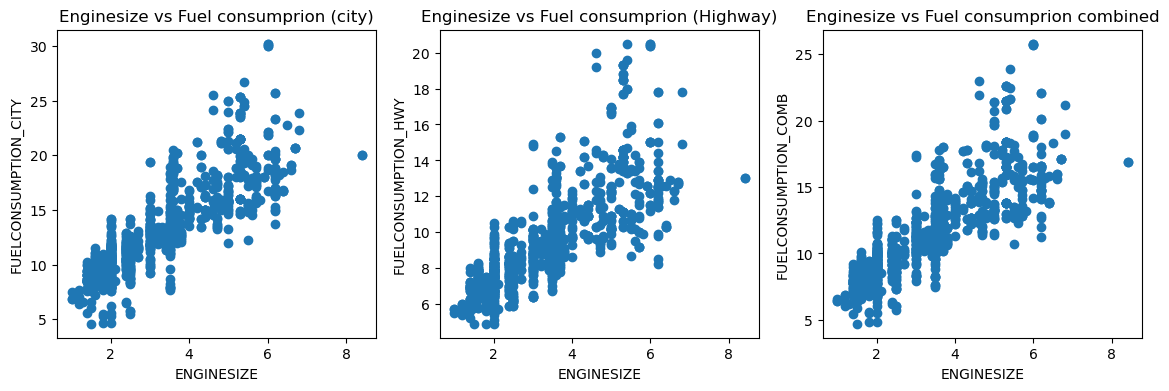

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14,4));

axes[0].scatter('ENGINESIZE', 'FUELCONSUMPTION_CITY', data=df);
axes[0].set_title('Enginesize vs Fuel consumprion (city)')
axes[0].set_xlabel('ENGINESIZE')
axes[0].set_ylabel('FUELCONSUMPTION_CITY')

axes[1].scatter('ENGINESIZE', 'FUELCONSUMPTION_HWY', data=df);
axes[1].set_title('Enginesize vs Fuel consumprion (Highway)')
axes[1].set_xlabel('ENGINESIZE')
axes[1].set_ylabel('FUELCONSUMPTION_HWY')

axes[2].scatter('ENGINESIZE', 'FUELCONSUMPTION_COMB', data=df);
axes[2].set_title('Enginesize vs Fuel consumprion combined')
axes[2].set_xlabel('ENGINESIZE')
axes[2].set_ylabel('FUELCONSUMPTION_COMB');

<p>With no surprise, the bigger the engine is, the larger its fuel consuption per distance is (l/100km)</p>

<p>Let's now take a look at relationships between different fuel consuption features and CO2 emmision feature</p>

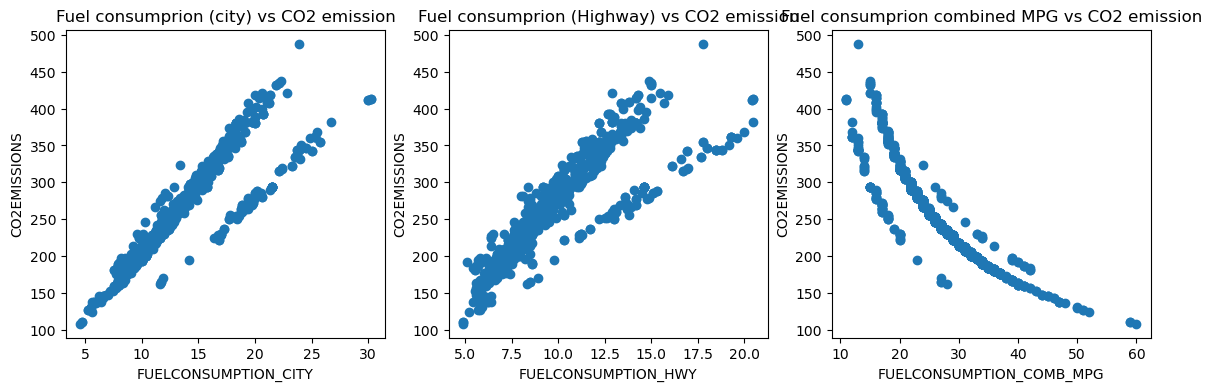

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(14,4));

axes[0].scatter('FUELCONSUMPTION_CITY', 'CO2EMISSIONS', data=df);
axes[0].set_title('Fuel consumprion (city) vs CO2 emission')
axes[0].set_ylabel('CO2EMISSIONS',)
axes[0].set_xlabel('FUELCONSUMPTION_CITY')

axes[1].scatter('FUELCONSUMPTION_HWY', 'CO2EMISSIONS', data=df);
axes[1].set_title('Fuel consumprion (Highway) vs CO2 emission')
axes[1].set_ylabel('CO2EMISSIONS')
axes[1].set_xlabel('FUELCONSUMPTION_HWY')

axes[2].scatter('FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS', data=df);
axes[2].set_title('Fuel consumprion combined MPG vs CO2 emission')
axes[2].set_ylabel('CO2EMISSIONS')
axes[2].set_xlabel('FUELCONSUMPTION_COMB_MPG');

<p>Let's now visualise the correction between the dataset deatures</p>

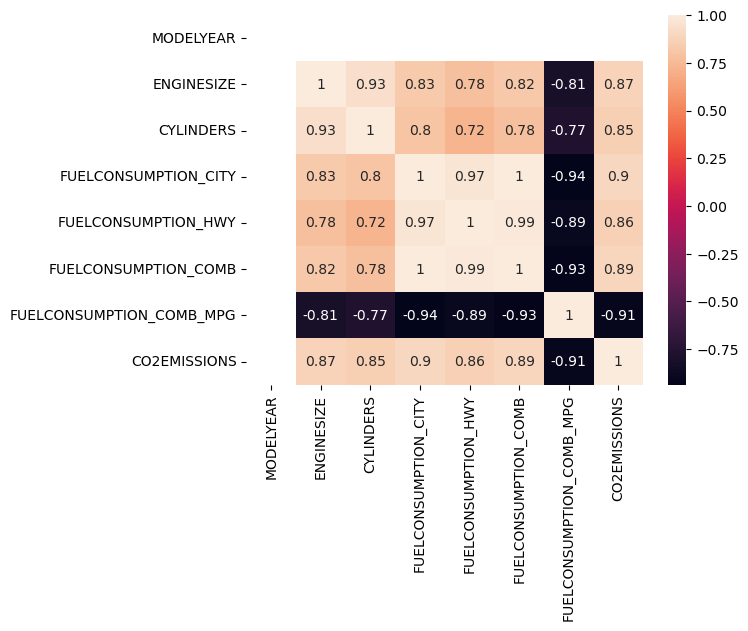

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [119]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

<p style="font-size: 22px; font-weight: bold;">Model development</p>

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<p>The model we are going to use is multi-linear regression. For that, X will be constituted by the features that are correlated to our target feature (the ones analysed below)</p>

In [53]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]

In [55]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [57]:
y = df['CO2EMISSIONS']

In [59]:
scaler = StandardScaler()  # we'll need to scale the data because they have different ranges

In [61]:
model = LinearRegression()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [65]:
scaler.fit(X_train)

StandardScaler()

In [67]:
X_train_scaled = scaler.transform(X_train)

In [69]:
X_test_scaled = scaler.transform(X_test)

In [71]:
model.fit(X_train_scaled, y_train)

LinearRegression()

<p style="font-size: 22px; font-weight: bold;">Model evaluation</p>

In [73]:
y_pred = model.predict(X_test_scaled)

In [75]:
MSE = mean_squared_error(y_test, y_pred)

In [77]:
RMSE = np.sqrt(MSE)

In [81]:
print('Root mean squared error:', RMSE)

Root mean squared error: 19.37889192768454


In [85]:
print(f'CO2 emissions range: [{y.min()},{y.max()}]')

CO2 emissions range: [108,488]


In [89]:
R2_score = r2_score(y_test, y_pred)

In [91]:
print('R2 score:', R2_score)

R2 score: 0.9064221756687783


<p>
    <strong>Conclusion:</strong>
    <br>Comperaring the root mean squared error (19.38) to the CO2 feature range [108,488], I judge that the RMSE is acceptable. In addition, the model explains more than 90% of the dataset (R2_score). Therefore, my model is ready for unseen real world data.
</p>